In [1]:
import networkx as nx
import pandas as pd

# Definitions


In [2]:
definitions = pd.read_json('../data/definitions.json', typ='split')
using_nodes = ["Gene","Compound","Disease"]

#metanodes -"Gene","Compound","Disease"
for node in using_nodes:
    print(f'{node} : {definitions["metanodes"].get(node)}')

Gene : Protein-coding human genes. From Entrez Gene.
Compound : Approved small molecule compounds with documented chemical structures. From DrugBank.
Disease : Complex diseases, selected to be distinct and specific enough to be clinically relevant yet general enough to be well annotated. From Disease Ontology.


In [3]:
not_using_nodes = [node for node in definitions["metanodes"].keys() if node not in using_nodes]

In [4]:
using_edges = []

for edge in definitions["metaedges"].keys():
    e = edge.split('–')
    if (e[0] not in not_using_nodes) and (e[-1] not in not_using_nodes):
        using_edges.append(edge.replace('–',' - '))
        print(f'{edge} : {definitions["metaedges"].get(edge)}','\n')

Compound–binds–Gene : The Compound physically binds to the Gene's protein product according to BindingDB, DrugBank, or DrugCentral 

Compound–downregulates–Gene : The Gene is under-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Compound–palliates–Disease : The Compound is a symptomatic indication for the Disease (i.e. the Compound treats a significant symptom of the Disease) according to PharmacotherapyDB 

Compound–resembles–Compound : The Compounds are chemical similar to each other: Their extended connectivity fingerprints have a Dice coefficient ≥ 0.5. 

Compound–treats–Disease : The Compound is a disease-modifying indication for the Disease (i.e. the Compound therapeutically changes the underlying or downstream biology of the Disease) according to PharmacotherapyDB 

Compound–upregulates–Gene : The Gene is over-expressed in samples exposed to the Compound according to a consensus signature from LINCS L1000 

Disease–associates–Ge

# nodes


In [5]:
metanodes = pd.read_csv('../data/metanodes.tsv', sep='\t')
metanodes.query('metanode in @using_nodes')

,metanode,abbreviation,metaedges,nodes,unconnected_nodes
3,Compound,C,8,1552,14
4,Disease,D,8,137,1
5,Gene,G,16,20945,1800


In [6]:
nodes = pd.read_csv('../data/hetionet-v1.0-nodes.tsv', sep='\t')
cancer_nodes = nodes[(nodes['kind'] == 'Disease') & nodes['name'].str.contains('cancer')]
cancer_nodes = list(cancer_nodes['id'])

In [7]:
nodes.query('kind in @using_nodes', inplace=True)

# nodes['id'] = nodes['id'].str.split('::').str[-1]

In [8]:
nodes

#### id is the node identifier prepended with the node type plus :: as a separator. 
#### name is the node name. 
#### kind is the node type.

,id,name,kind
13174,Compound::DB00014,Goserelin,Compound
13175,Compound::DB00035,Desmopressin,Compound
13176,Compound::DB00050,Cetrorelix,Compound
13177,Compound::DB00091,Cyclosporine,Compound
13178,Compound::DB00093,Felypressin,Compound
...,...,...,...
35803,Gene::9991,PTBP3,Gene
35804,Gene::9992,KCNE2,Gene
35805,Gene::9993,DGCR2,Gene
35806,Gene::9994,CASP8AP2,Gene


# edges

In [9]:
metaedges = pd.read_csv('../data/metaedges.tsv', sep='\t')
metaedges.query('metaedge in @using_edges | metaedge == "Gene > regulates > Gene"',inplace=True)
metaedges

,metaedge,abbreviation,edges,source_nodes,target_nodes,unbiased
3,Compound - binds - Gene,CbG,11571,1389,1689,0
5,Compound - downregulates - Gene,CdG,21102,734,2880,21102
6,Compound - palliates - Disease,CpD,390,221,50,0
7,Compound - resembles - Compound,CrC,6486,1042,1054,6486
8,Compound - treats - Disease,CtD,755,387,77,0
9,Compound - upregulates - Gene,CuG,18756,703,3247,18756
10,Disease - associates - Gene,DaG,12623,134,5392,1284
11,Disease - downregulates - Gene,DdG,7623,44,5745,7623
14,Disease - resembles - Disease,DrD,543,112,106,0
15,Disease - upregulates - Gene,DuG,7731,44,5630,7731


In [10]:
edge_file = '../data/edges.sif'
edges = pd.read_csv(edge_file, sep='\t',)

In [11]:
edges = pd.merge(metaedges[['metaedge','abbreviation']], edges, left_on='abbreviation', right_on='metaedge')
edges.drop('metaedge_y', axis=1, inplace=True)
edges

,metaedge_x,abbreviation,source,target
0,Compound - binds - Gene,CbG,Compound::DB00514,Gene::1136
1,Compound - binds - Gene,CbG,Compound::DB00686,Gene::2246
2,Compound - binds - Gene,CbG,Compound::DB00786,Gene::4317
3,Compound - binds - Gene,CbG,Compound::DB01209,Gene::4988
4,Compound - binds - Gene,CbG,Compound::DB01588,Gene::2560
...,...,...,...,...
562101,Gene > regulates > Gene,Gr>G,Gene::5184,Gene::8659
562102,Gene > regulates > Gene,Gr>G,Gene::22818,Gene::5613
562103,Gene > regulates > Gene,Gr>G,Gene::29888,Gene::5467
562104,Gene > regulates > Gene,Gr>G,Gene::5894,Gene::595


In [12]:
import pandas as pd

# 필터링 조건
condition = ((edges['source'].isin(cancer_nodes)) | (edges['target'].isin(cancer_nodes)))

# 조건에 맞는 행 선택
selected_edges = edges[condition]

# 결과 출력
selected_edges

,metaedge_x,abbreviation,source,target
32689,Compound - palliates - Disease,CpD,Compound::DB00741,Disease::DOID:263
32717,Compound - palliates - Disease,CpD,Compound::DB00443,Disease::DOID:1319
32722,Compound - palliates - Disease,CpD,Compound::DB00813,Disease::DOID:10283
32734,Compound - palliates - Disease,CpD,Compound::DB00673,Disease::DOID:219
32737,Compound - palliates - Disease,CpD,Compound::DB00443,Disease::DOID:1612
...,...,...,...,...
87556,Disease - upregulates - Gene,DuG,Disease::DOID:263,Gene::157
87567,Disease - upregulates - Gene,DuG,Disease::DOID:1793,Gene::1520
87574,Disease - upregulates - Gene,DuG,Disease::DOID:219,Gene::717
87576,Disease - upregulates - Gene,DuG,Disease::DOID:1324,Gene::60625


In [13]:
compound = list(set(selected_edges.loc[selected_edges['source'].str.contains('Compound'), 'source'].tolist() +
                      selected_edges.loc[selected_edges['target'].str.contains('Compound'), 'target'].tolist()))

disease = list(set(selected_edges.loc[selected_edges['source'].str.contains('Disease'), 'source'].tolist() +
                     selected_edges.loc[selected_edges['target'].str.contains('Disease'), 'target'].tolist()))

gene = list(set(selected_edges.loc[selected_edges['source'].str.contains('Gene'), 'source'].tolist() +
                  selected_edges.loc[selected_edges['target'].str.contains('Gene'), 'target'].tolist()))

# label

In [14]:
connected_compound_disease = selected_edges[(selected_edges['source'].str.contains('Compound')) & (selected_edges['target'].str.contains('Disease'))]

In [15]:
connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)
connected_compound_disease = connected_compound_disease.assign(label = 1)

/var/folders/h7/80308m4j7kg6zp9y8km0_ydm0000gn/T/ipykernel_6287/278530246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  connected_compound_disease.drop(['metaedge_x', 'abbreviation'],axis=1, inplace=True)


In [16]:
connected_compound_disease_list = list(zip(connected_compound_disease['source'],connected_compound_disease['target']))

# 그래프 생성

In [17]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(compound,group='compound', weight=2)
G.add_nodes_from(gene,group='gene', weight=1)
G.add_nodes_from(disease,group='disease', weight=2)

In [18]:
# 엣지 추가 및 가중치 부여
for _, edge in selected_edges.iterrows():
    source = edge['source']
    target = edge['target']
    weight = 2 if G.nodes[source]['group'] == 'compound' and G.nodes[target]['group'] == 'disease' else 1
    G.add_edge(source, target, weight=weight)

In [19]:
print(G['Disease::DOID:1612']['Gene::1894'])

{'weight': 1}


In [20]:
print(G['Compound::DB00443']['Disease::DOID:1612'])

{'weight': 2}


# Node2Vec

In [21]:
from node2vec import Node2Vec

# Node2Vec 모델 생성 및 학습
node2vec = Node2Vec(G, dimensions=30, walk_length=30, num_walks=200, workers=4, p=2.0, q=0.5)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/4883 [00:00<?, ?it/s]

Generating walks (CPU: 3):   6%|▌         | 3/50 [00:05<01:32,  1.96s/it]

KeyboardInterrupt: 

In [ ]:
# 노드 임베딩 확인
embedding = model.wv[compound[0]]
print(f'Embedding for Node:, {compound[0]}, \n {embedding}')

Embedding for Node:, Compound::DB00552, 
 [ 0.21610239 -0.31165093 -0.17352872 -0.03521351  0.17815381 -0.37124196
 -0.06408934  0.12661201 -0.00353705 -0.11807594  0.37707362 -0.02083228
  0.32932365  0.18443435 -0.5505745   0.13401829 -0.42710495 -0.1944682
 -0.0551716  -0.30114806  0.11612302  0.76016957  0.16692027 -0.08349235
  0.4462029  -0.12060221 -0.7470429  -0.14376336  0.10641035 -0.26958567]


In [ ]:
embedding = model.wv[disease[0]]
print(f'Embedding for Node:, {disease[0]}, \n {embedding}')

Embedding for Node:, Disease::DOID:1245, 
 [-0.15372927  0.00995324  0.7490195   0.34642118 -0.00545944 -0.16958189
  0.05917841 -0.25951892 -0.32436997  0.03768659  0.30588517  0.22302797
  0.38049674 -0.06835563  0.12126502 -0.37482515 -0.17213112 -0.6560181
 -0.71728534  0.14314194 -0.5416712   0.3711295  -0.6620593   0.76214534
  0.08327095  0.19469786 -0.06318765  0.01296383  0.44182646 -0.10906587]


# 데이터

In [ ]:
#cartesian product
df1 = pd.DataFrame({'source':compound})
df2 = pd.DataFrame({'target':disease})

compound_disease = pd.merge(df1.assign(key=1),df2.assign(key=1), on='key').drop('key', axis=1)

#label
compound_disease = pd.merge(compound_disease, connected_compound_disease, how='outer')
compound_disease = compound_disease.fillna(0)
compound_disease

,source,target,label
0,Compound::DB00552,Disease::DOID:1245,0.0
1,Compound::DB00552,Disease::DOID:8577,0.0
2,Compound::DB00552,Disease::DOID:175,0.0
3,Compound::DB00552,Disease::DOID:2994,0.0
4,Compound::DB00552,Disease::DOID:1192,0.0
...,...,...,...
9115,Compound::DB00262,Disease::DOID:10534,0.0
9116,Compound::DB00262,Disease::DOID:1993,0.0
9117,Compound::DB00262,Disease::DOID:13223,0.0
9118,Compound::DB00262,Disease::DOID:12236,0.0


In [ ]:
compound_disease_label = []
for com in compound:
    for dis in disease:
        val = []
        val.append(com)
        val.append(dis)
        tup = (com,dis)
        if tup in connected_compound_disease_list:
            val.append(1)
        else:
            val.append(0)
        compound_disease_label.append(val)

In [ ]:
import numpy as np

input = []
for data in compound_disease_label:
    input.append(np.vstack([model.wv[data[0]], model.wv[data[1]]]).reshape(60,))


# Classification

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=0)

lr.fit(X_train,y_train)	

LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
print(lr.coef_ ,'\n' ,lr.intercept_)

[[-2.44940417  2.44766514  2.95008865  0.22663621  0.26827593 -0.22418562
  -1.24961205  1.40968919 -0.19572946 -1.10918387  0.86670898  0.13351355
  -2.03975831 -1.14806335 -0.83041791  0.72730541 -0.41297176  0.63241192
   0.59214355 -1.68750465 -0.5398304  -1.91990747  0.84525355  0.78068996
   0.44149526 -0.89994534  4.39678976 -0.61811903 -0.14527442  0.91057442
  -0.1663339   1.32619288 -3.98666023  2.35932615 -1.00649229  0.91262069
  -1.91676934  0.69471273 -2.08933059 -0.14027646 -0.46012622  0.43435735
   3.54183599  0.67692249  1.5486314  -2.28652015  0.24659971 -0.93392439
   3.16371451  1.17334561  5.34988099 -2.50150663  2.05125041 -5.45950174
  -0.0691028  -0.87667791 -1.58706645  3.6117184  -0.43924049  2.9913842 ]] 
 [8.50329992]


In [ ]:
lr.score(X_test,y_test)
															    

0.8958333333333334

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 테스트 세트에 대한 예측
y_pred = lr.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8958333333333334
Precision: 0.226890756302521
Recall: 0.9
F1 Score: 0.3624161073825503
Confusion Matrix:
[[2370  276]
 [   9   81]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# XGBoost 모델 생성 및 학습
xg1 = xgb.XGBClassifier(random_state=0)
xg1.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = xg1.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9842836257309941
Precision: 0.8507462686567164
Recall: 0.6333333333333333
F1 Score: 0.7261146496815286
Confusion Matrix:
[[2636   10]
 [  33   57]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg2 = xgb.XGBClassifier(random_state=0)
xg2.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg2.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8961988304093568
Precision: 0.23497267759562843
Recall: 0.9555555555555556
F1 Score: 0.3771929824561404
Confusion Matrix:
[[2366  280]
 [   4   86]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(input, compound_disease['label'], test_size=0.3, random_state=0, stratify=compound_disease['label'])

# 오버샘플링 적용
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 학습
xg3 = xgb.XGBClassifier(random_state=0)
xg3.fit(X_resampled, y_resampled)

# 테스트 세트에 대한 예측
y_pred = xg3.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9817251461988304
Precision: 0.717391304347826
Recall: 0.7333333333333333
F1 Score: 0.7252747252747253
Confusion Matrix:
[[2620   26]
 [  24   66]]


# Evaluation

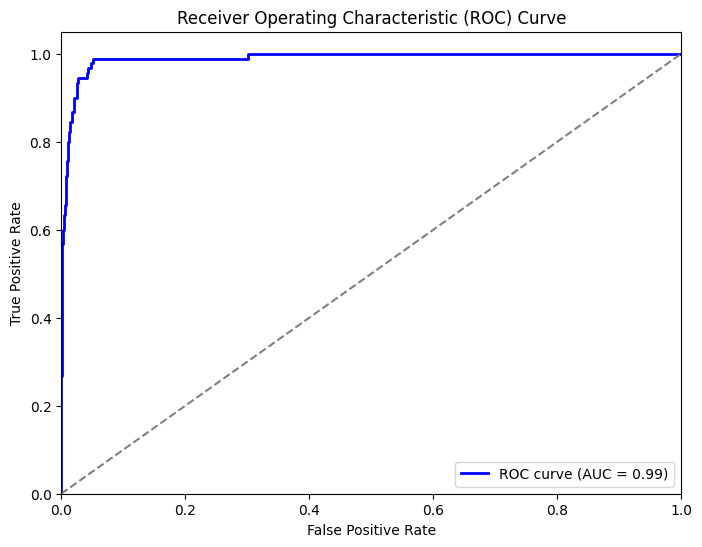

In [ ]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt

y_probs = xg3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = sm.roc_curve(y_test, y_probs)

# AUC (Area Under the ROC Curve) 계산
auc = sm.roc_auc_score(y_test, y_probs)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# breast cancer 약물 예측 결과

In [ ]:
#Disease::DOID:1612 = breast cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:1612': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1612']]).reshape(60,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1612'], 'label': 0})], ignore_index=True)
input2

[array([ 0.21610239, -0.31165093, -0.17352872, -0.03521351,  0.17815381,
        -0.37124196, -0.06408934,  0.12661201, -0.00353705, -0.11807594,
         0.37707362, -0.02083228,  0.32932365,  0.18443435, -0.5505745 ,
         0.13401829, -0.42710495, -0.1944682 , -0.0551716 , -0.30114806,
         0.11612302,  0.76016957,  0.16692027, -0.08349235,  0.4462029 ,
        -0.12060221, -0.7470429 , -0.14376336,  0.10641035, -0.26958567,
         0.05400237, -0.5092244 , -0.37015465, -0.10671701, -0.21869615,
        -0.11469168,  0.14654498, -0.38392743, -0.02876651, -0.21825996,
        -0.556964  , -0.043242  ,  0.3465803 ,  0.24109396, -0.12203073,
        -0.45709404, -0.14847352, -0.26395407, -0.03400347,  0.3382574 ,
        -0.01244688,  0.24038455,  0.04969745,  0.31806064,  0.32503968,
        -0.09612549, -0.23431207, -0.61548084, -0.17545986, -0.15831193],
       dtype=float32),
 array([ 0.25802147,  0.04710198, -0.36761892, -0.502331  ,  0.03674876,
        -0.13956787,  0.853

In [ ]:
# 테스트 세트에 대한 예측
prediction = xg3.predict(input2)
len(prediction)

120

In [ ]:
df = compound_disease[compound_disease['target'] == 'Disease::DOID:1612']
df['label'] = prediction
df

C:\Users\young\AppData\Local\Temp\ipykernel_6372\276919696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,source,target,label
31,Compound::DB00552,Disease::DOID:1612,0
107,Compound::DB00385,Disease::DOID:1612,0
183,Compound::DB00126,Disease::DOID:1612,0
259,Compound::DB08866,Disease::DOID:1612,1
335,Compound::DB00443,Disease::DOID:1612,1
...,...,...,...
8771,Compound::DB00947,Disease::DOID:1612,1
8847,Compound::DB00959,Disease::DOID:1612,0
8923,Compound::DB01181,Disease::DOID:1612,0
8999,Compound::DB00523,Disease::DOID:1612,0


In [ ]:
# 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]

# 결과 출력
print(len(selected_rows))

46


In [ ]:
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1612']
print(rows)

                  source              target  label
32737  Compound::DB00443  Disease::DOID:1612      1
32738  Compound::DB00977  Disease::DOID:1612      1
32762  Compound::DB00433  Disease::DOID:1612      1
32776  Compound::DB00673  Disease::DOID:1612      1
32788  Compound::DB00351  Disease::DOID:1612      1
32812  Compound::DB00286  Disease::DOID:1612      1
32844  Compound::DB00624  Disease::DOID:1612      1
32864  Compound::DB06710  Disease::DOID:1612      1
32918  Compound::DB08866  Disease::DOID:1612      1
32927  Compound::DB01234  Disease::DOID:1612      1
32941  Compound::DB01420  Disease::DOID:1612      1
32966  Compound::DB00603  Disease::DOID:1612      1
33013  Compound::DB00655  Disease::DOID:1612      1
33057  Compound::DB00783  Disease::DOID:1612      1
39629  Compound::DB00291  Disease::DOID:1612      1
39634  Compound::DB01204  Disease::DOID:1612      1
39636  Compound::DB01101  Disease::DOID:1612      1
39639  Compound::DB00563  Disease::DOID:1612      1
39651  Compo

In [ ]:
rows_list = rows['source'].tolist()
compound_list = []
num = 0
for i in selected_rows['source']:
    if i not in rows_list:
        num+=1
        compound_list.append(i)
print(compound_list)

['Compound::DB00515', 'Compound::DB00773', 'Compound::DB01085']


In [ ]:
nodes[nodes['id'].isin(compound_list)]

,id,name,kind
13558,Compound::DB00515,Cisplatin,Compound
13809,Compound::DB00773,Etoposide,Compound
14108,Compound::DB01085,Pilocarpine,Compound


In [ ]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = xg3.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted[df_sorted['label']==0]

C:\Users\young\AppData\Local\Temp\ipykernel_6372\2504854834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities


,source,target,label,label_prob
8923,Compound::DB01181,Disease::DOID:1612,0,0.492861
3527,Compound::DB00970,Disease::DOID:1612,0,0.374662
3755,Compound::DB00488,Disease::DOID:1612,0,0.241064
107,Compound::DB00385,Disease::DOID:1612,0,0.101669
2843,Compound::DB00482,Disease::DOID:1612,0,0.082202
...,...,...,...,...
6491,Compound::DB00853,Disease::DOID:1612,0,0.000288
6111,Compound::DB00707,Disease::DOID:1612,0,0.000189
3451,Compound::DB00317,Disease::DOID:1612,0,0.000173
2995,Compound::DB08865,Disease::DOID:1612,0,0.000096


# liver cancer 약물 재창출

In [ ]:
#Disease::DOID:3571 = liver cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:3571': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:3571']]).reshape(60,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:3571'], 'label': 0})], ignore_index=True)

prediction = xg3.predict(input2)

df = compound_disease[compound_disease['target'] == 'Disease::DOID:3571']
df['label'] = prediction

# 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:3571']
rows_list = rows['source'].tolist()

compound_list = []
num = 0
for i in selected_rows['source']:
    if i not in rows_list:
        num+=1
        compound_list.append(i)

#에측결과에서 실제결과 값을 제외한 결과
nodes[nodes['id'].isin(compound_list)]

C:\Users\young\AppData\Local\Temp\ipykernel_6372\551358292.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind


In [ ]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = xg3.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted[df_sorted['label']==0]

C:\Users\young\AppData\Local\Temp\ipykernel_6372\2504854834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities


,source,target,label,label_prob
6924,Compound::DB01268,Disease::DOID:3571,0,6.176392e-02
844,Compound::DB05294,Disease::DOID:3571,0,1.946807e-02
3200,Compound::DB00104,Disease::DOID:3571,0,1.182402e-02
6848,Compound::DB00441,Disease::DOID:3571,0,7.898666e-03
1908,Compound::DB00530,Disease::DOID:3571,0,5.766924e-03
...,...,...,...,...
8976,Compound::DB00523,Disease::DOID:3571,0,3.244106e-07
4568,Compound::DB00619,Disease::DOID:3571,0,2.893342e-07
4644,Compound::DB00888,Disease::DOID:3571,0,2.569047e-07
3124,Compound::DB01073,Disease::DOID:3571,0,2.408634e-07


# lung cancer 약물 재창출

In [ ]:
#Disease::DOID:1324 = lung cancer
import numpy as np
input2 = []
ddf = pd.DataFrame(columns=['compound', 'disease', 'label'])
for data in compound_disease_label:
    if data[1]=='Disease::DOID:1324': 
        input2.append(np.vstack([model.wv[data[0]], model.wv['Disease::DOID:1324']]).reshape(60,))
        ddf = pd.concat([ddf, pd.DataFrame({'compound': [data[0]], 'disease': ['Disease::DOID:1324'], 'label': 0})], ignore_index=True)

prediction = xg3.predict(input2)

df = compound_disease[compound_disease['target'] == 'Disease::DOID:1324']
df['label'] = prediction

# 'label' 열 값이 1인 행 출력
selected_rows = df[df['label'] == 1]
rows = connected_compound_disease[connected_compound_disease['target']=='Disease::DOID:1324']
rows_list = rows['source'].tolist()

compound_list = []
num = 0
for i in selected_rows['source']:
    if i not in rows_list:
        num+=1
        compound_list.append(i)

#에측결과에서 실제결과 값을 제외한 결과
nodes[nodes['id'].isin(compound_list)]

C:\Users\young\AppData\Local\Temp\ipykernel_6372\3195546173.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = prediction


,id,name,kind
13997,Compound::DB00970,Dactinomycin,Compound


In [ ]:
# 테스트 세트에 대한 예측 확률 얻기
y_probabilities = xg3.predict_proba(input2)[:, 1]  # 1에 대한 예측 확률을 얻습니다.

# 'label_prob' 열에 예측 확률 추가
df['label_prob'] = y_probabilities

# label_prob를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='label_prob', ascending=False)

df_sorted[df_sorted['label']==0]

C:\Users\young\AppData\Local\Temp\ipykernel_6372\2504854834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_prob'] = y_probabilities


,source,target,label,label_prob
3901,Compound::DB00515,Disease::DOID:1324,0,0.489649
3369,Compound::DB00813,Disease::DOID:1324,0,0.474375
2077,Compound::DB01204,Disease::DOID:1324,0,0.232651
101,Compound::DB00385,Disease::DOID:1324,0,0.216569
2001,Compound::DB00762,Disease::DOID:1324,0,0.195459
...,...,...,...,...
4433,Compound::DB01008,Disease::DOID:1324,0,0.000003
3293,Compound::DB01280,Disease::DOID:1324,0,0.000003
4889,Compound::DB00261,Disease::DOID:1324,0,0.000003
6333,Compound::DB01254,Disease::DOID:1324,0,0.000002
